## Task 1

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('02_mushroom_data.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [2]:
# Display basic information about the dataset
df.info()
# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,7932
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,6
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
# Check for missing values
df.isnull().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

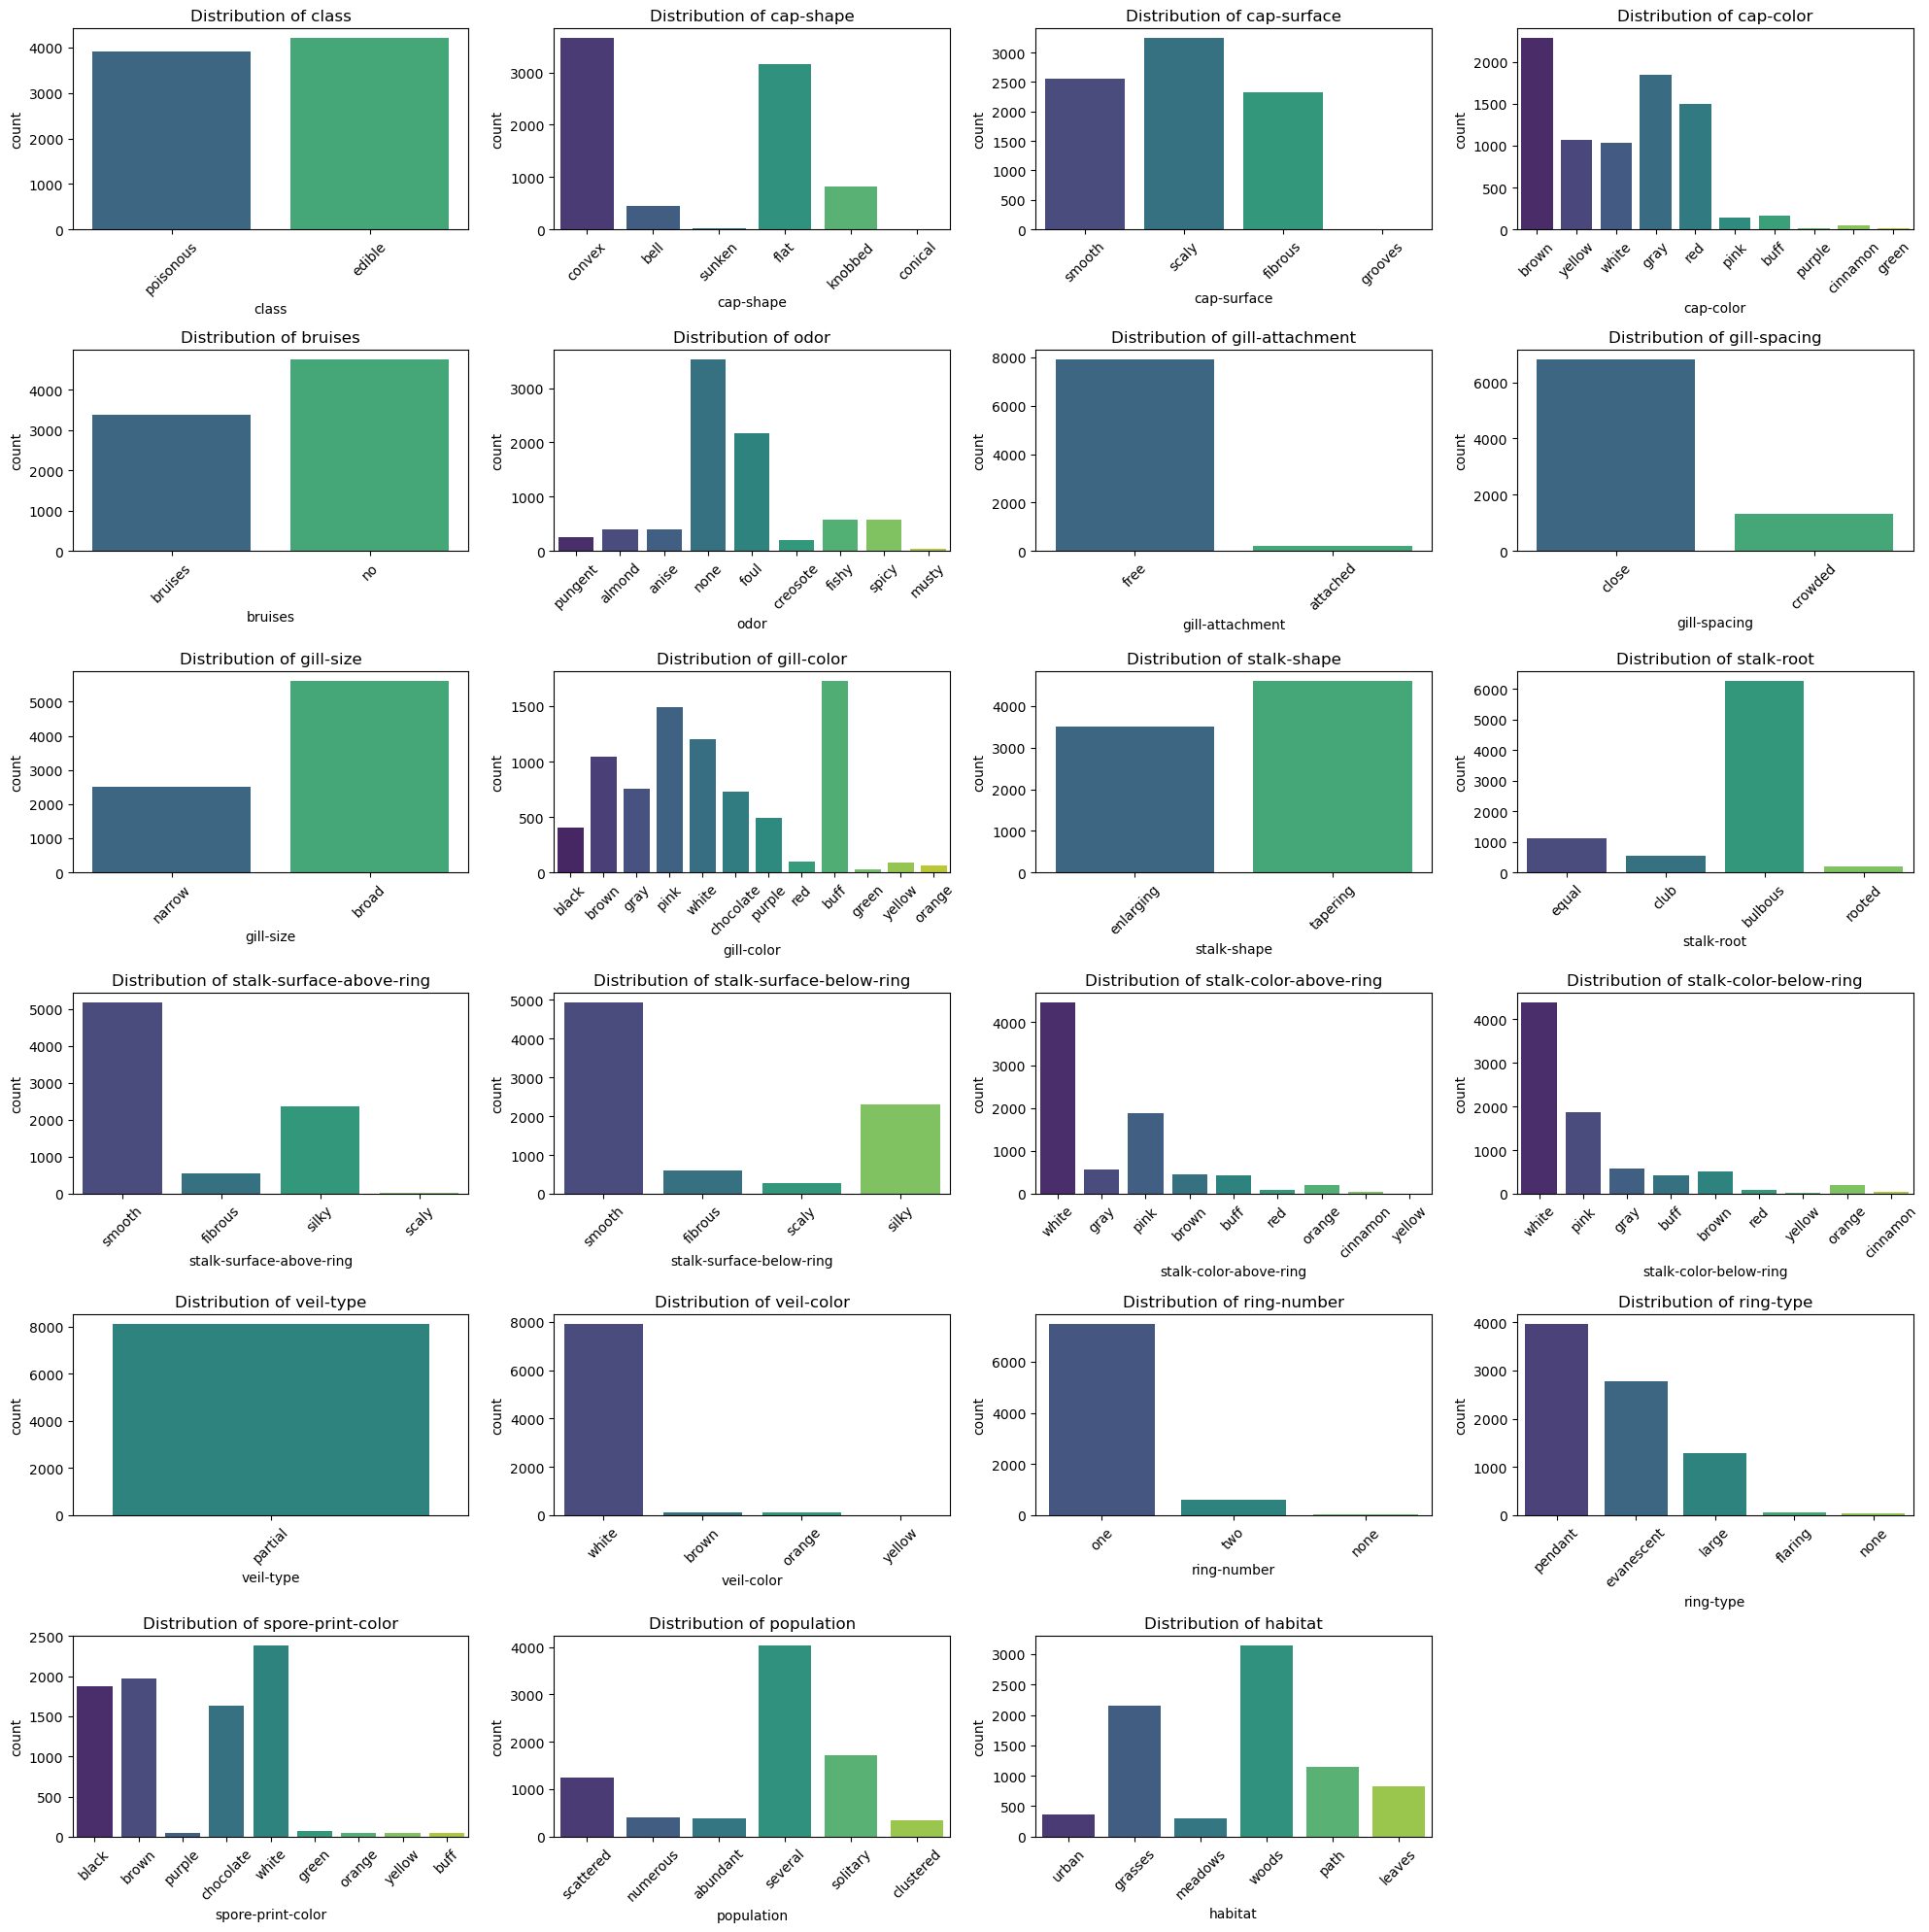

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of categorical variables
plt.figure(figsize=(20, 20))
num_plots = len(df.columns)
cols_per_row = 4  # Number of columns per row in subplot grid
rows = num_plots // cols_per_row + 1
for i, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        plt.subplot(rows, cols_per_row, i+1)
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
print("Encoded dataset:")
print(data_encoded.head())


Encoded dataset:
   class_poisonous  cap-shape_conical  cap-shape_convex  cap-shape_flat  \
0                1                  0                 1               0   
1                0                  0                 1               0   
2                0                  0                 0               0   
3                1                  0                 1               0   
4                0                  0                 1               0   

   cap-shape_knobbed  cap-shape_sunken  cap-surface_grooves  \
0                  0                 0                    0   
1                  0                 0                    0   
2                  0                 0                    0   
3                  0                 0                    0   
4                  0                 0                    0   

   cap-surface_scaly  cap-surface_smooth  cap-color_buff  ...  \
0                  0                   1               0  ...   
1                  0   

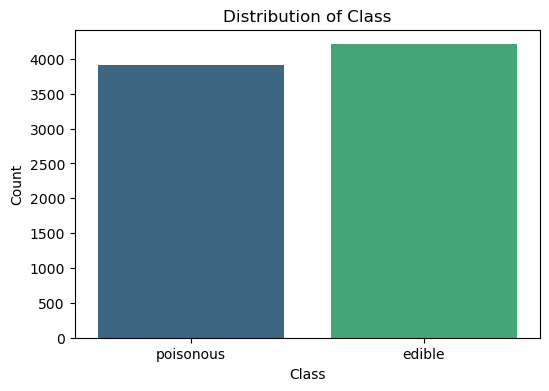

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

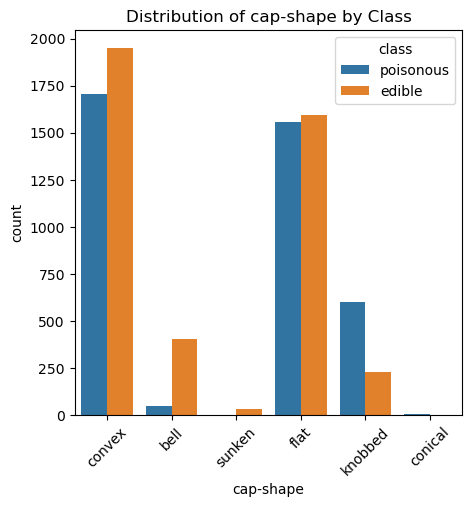

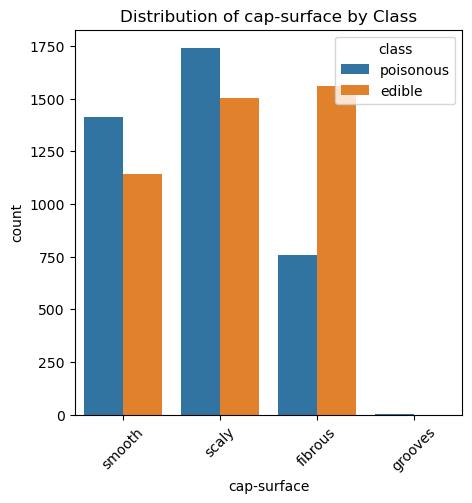

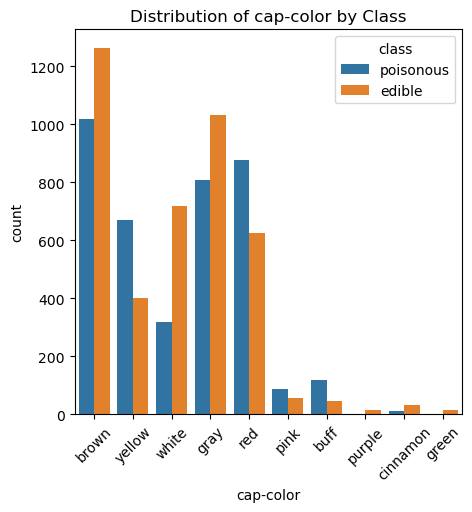

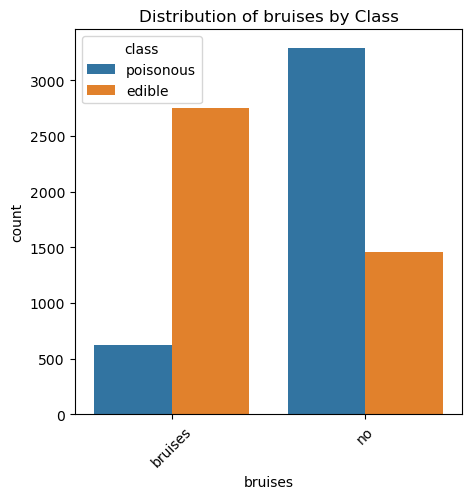

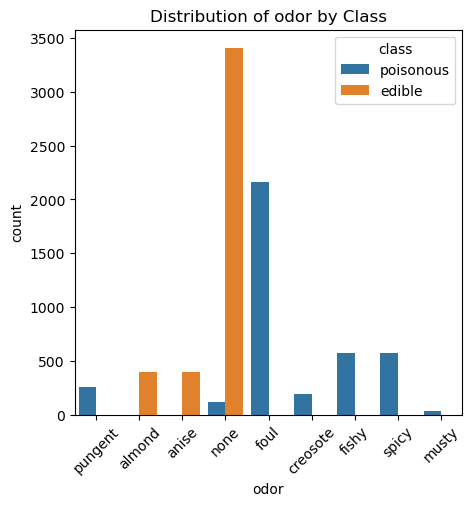

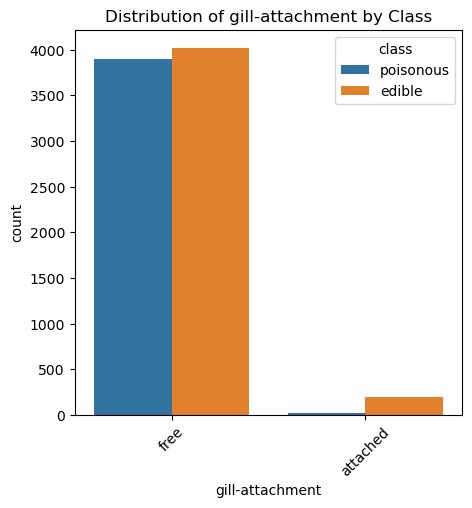

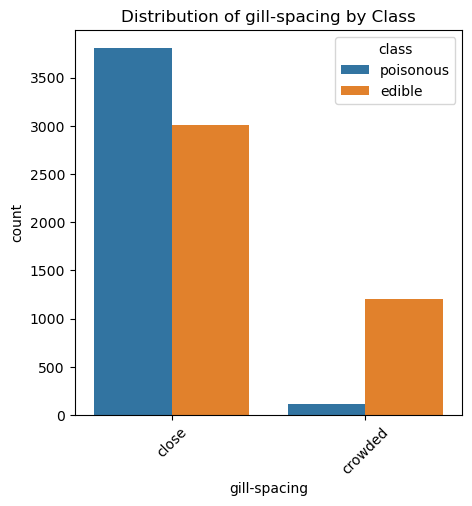

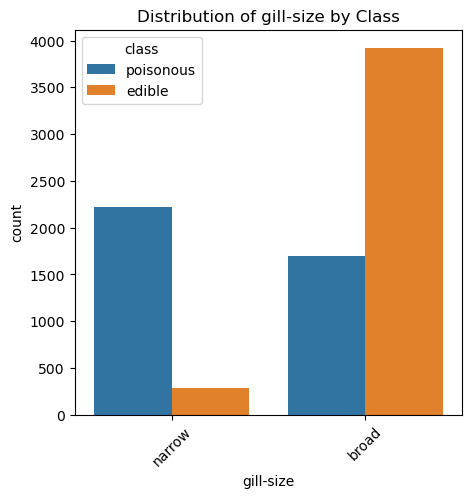

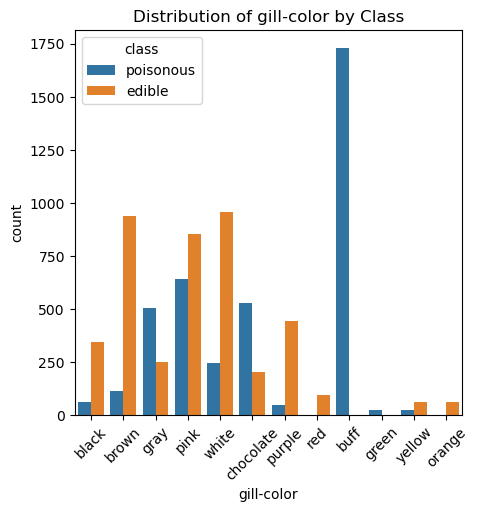

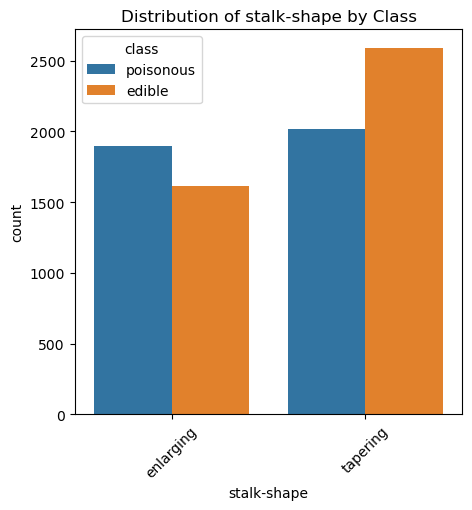

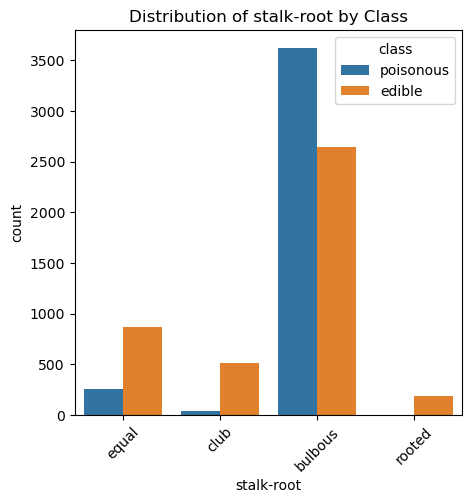

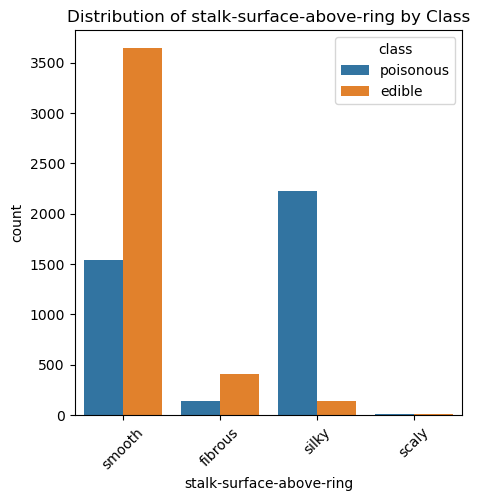

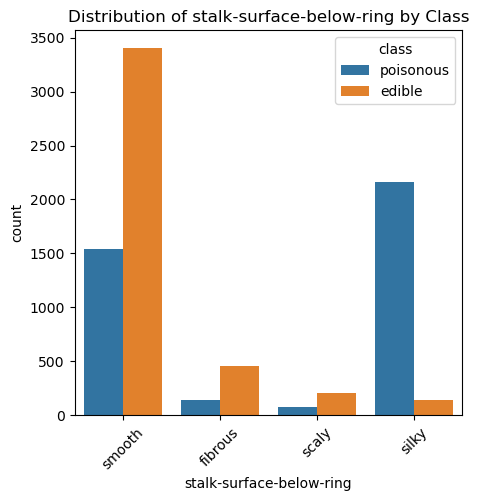

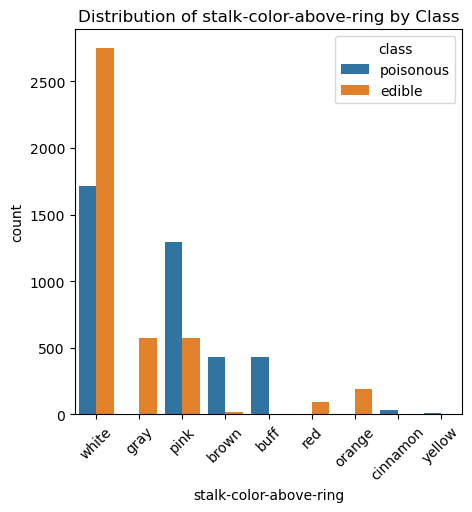

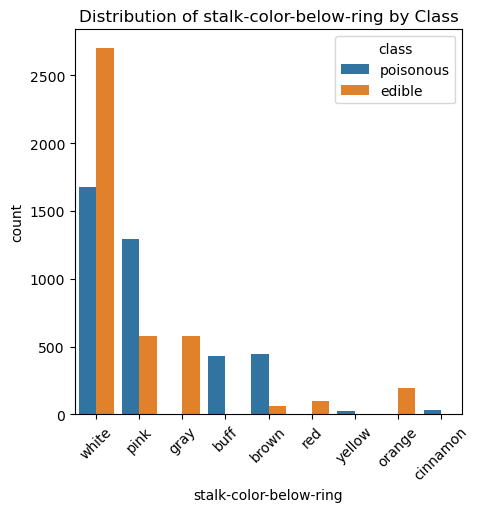

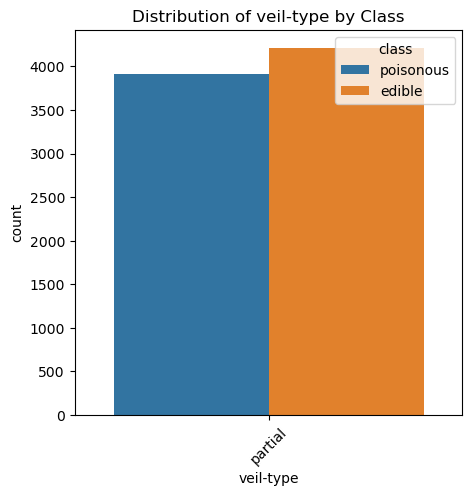

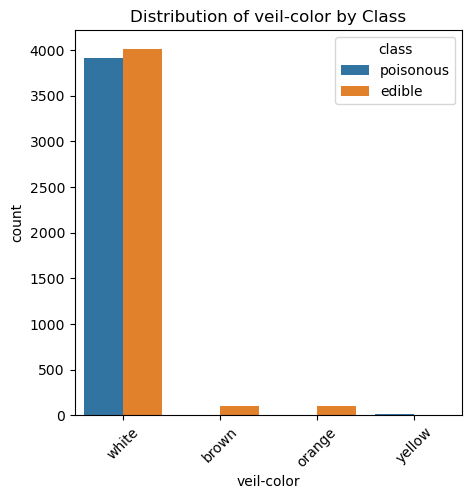

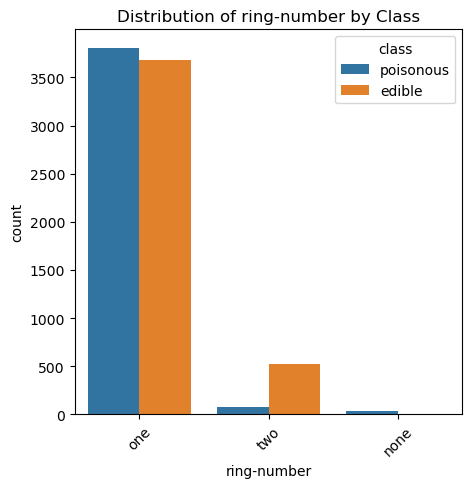

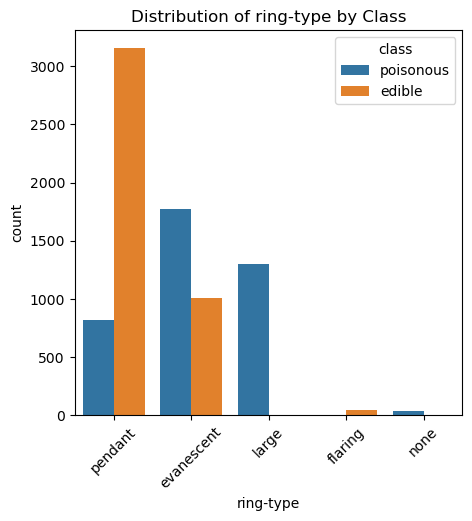

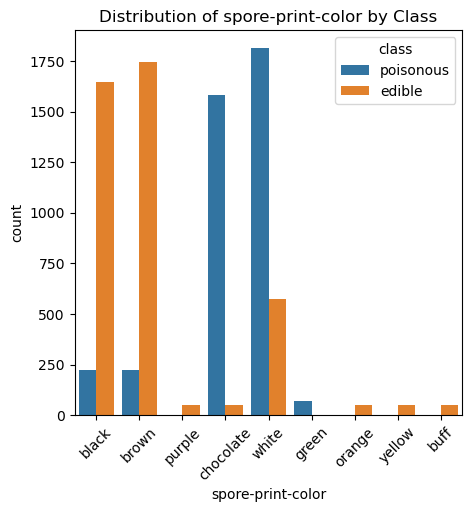

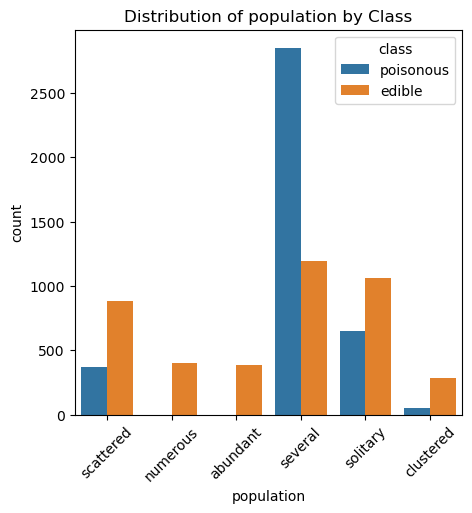

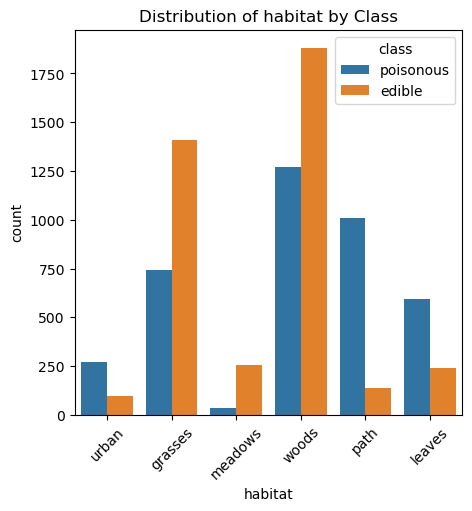

In [7]:
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                        'stalk-surface-below-ring', 'stalk-color-above-ring',
                        'stalk-color-below-ring', 'veil-type', 'veil-color',
                        'ring-number', 'ring-type', 'spore-print-color',
                        'population', 'habitat']
for feature in categorical_features:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, hue='class', data=df)
    plt.title('Distribution of ' + feature + ' by Class')
    plt.xticks(rotation=45)
    plt.show()

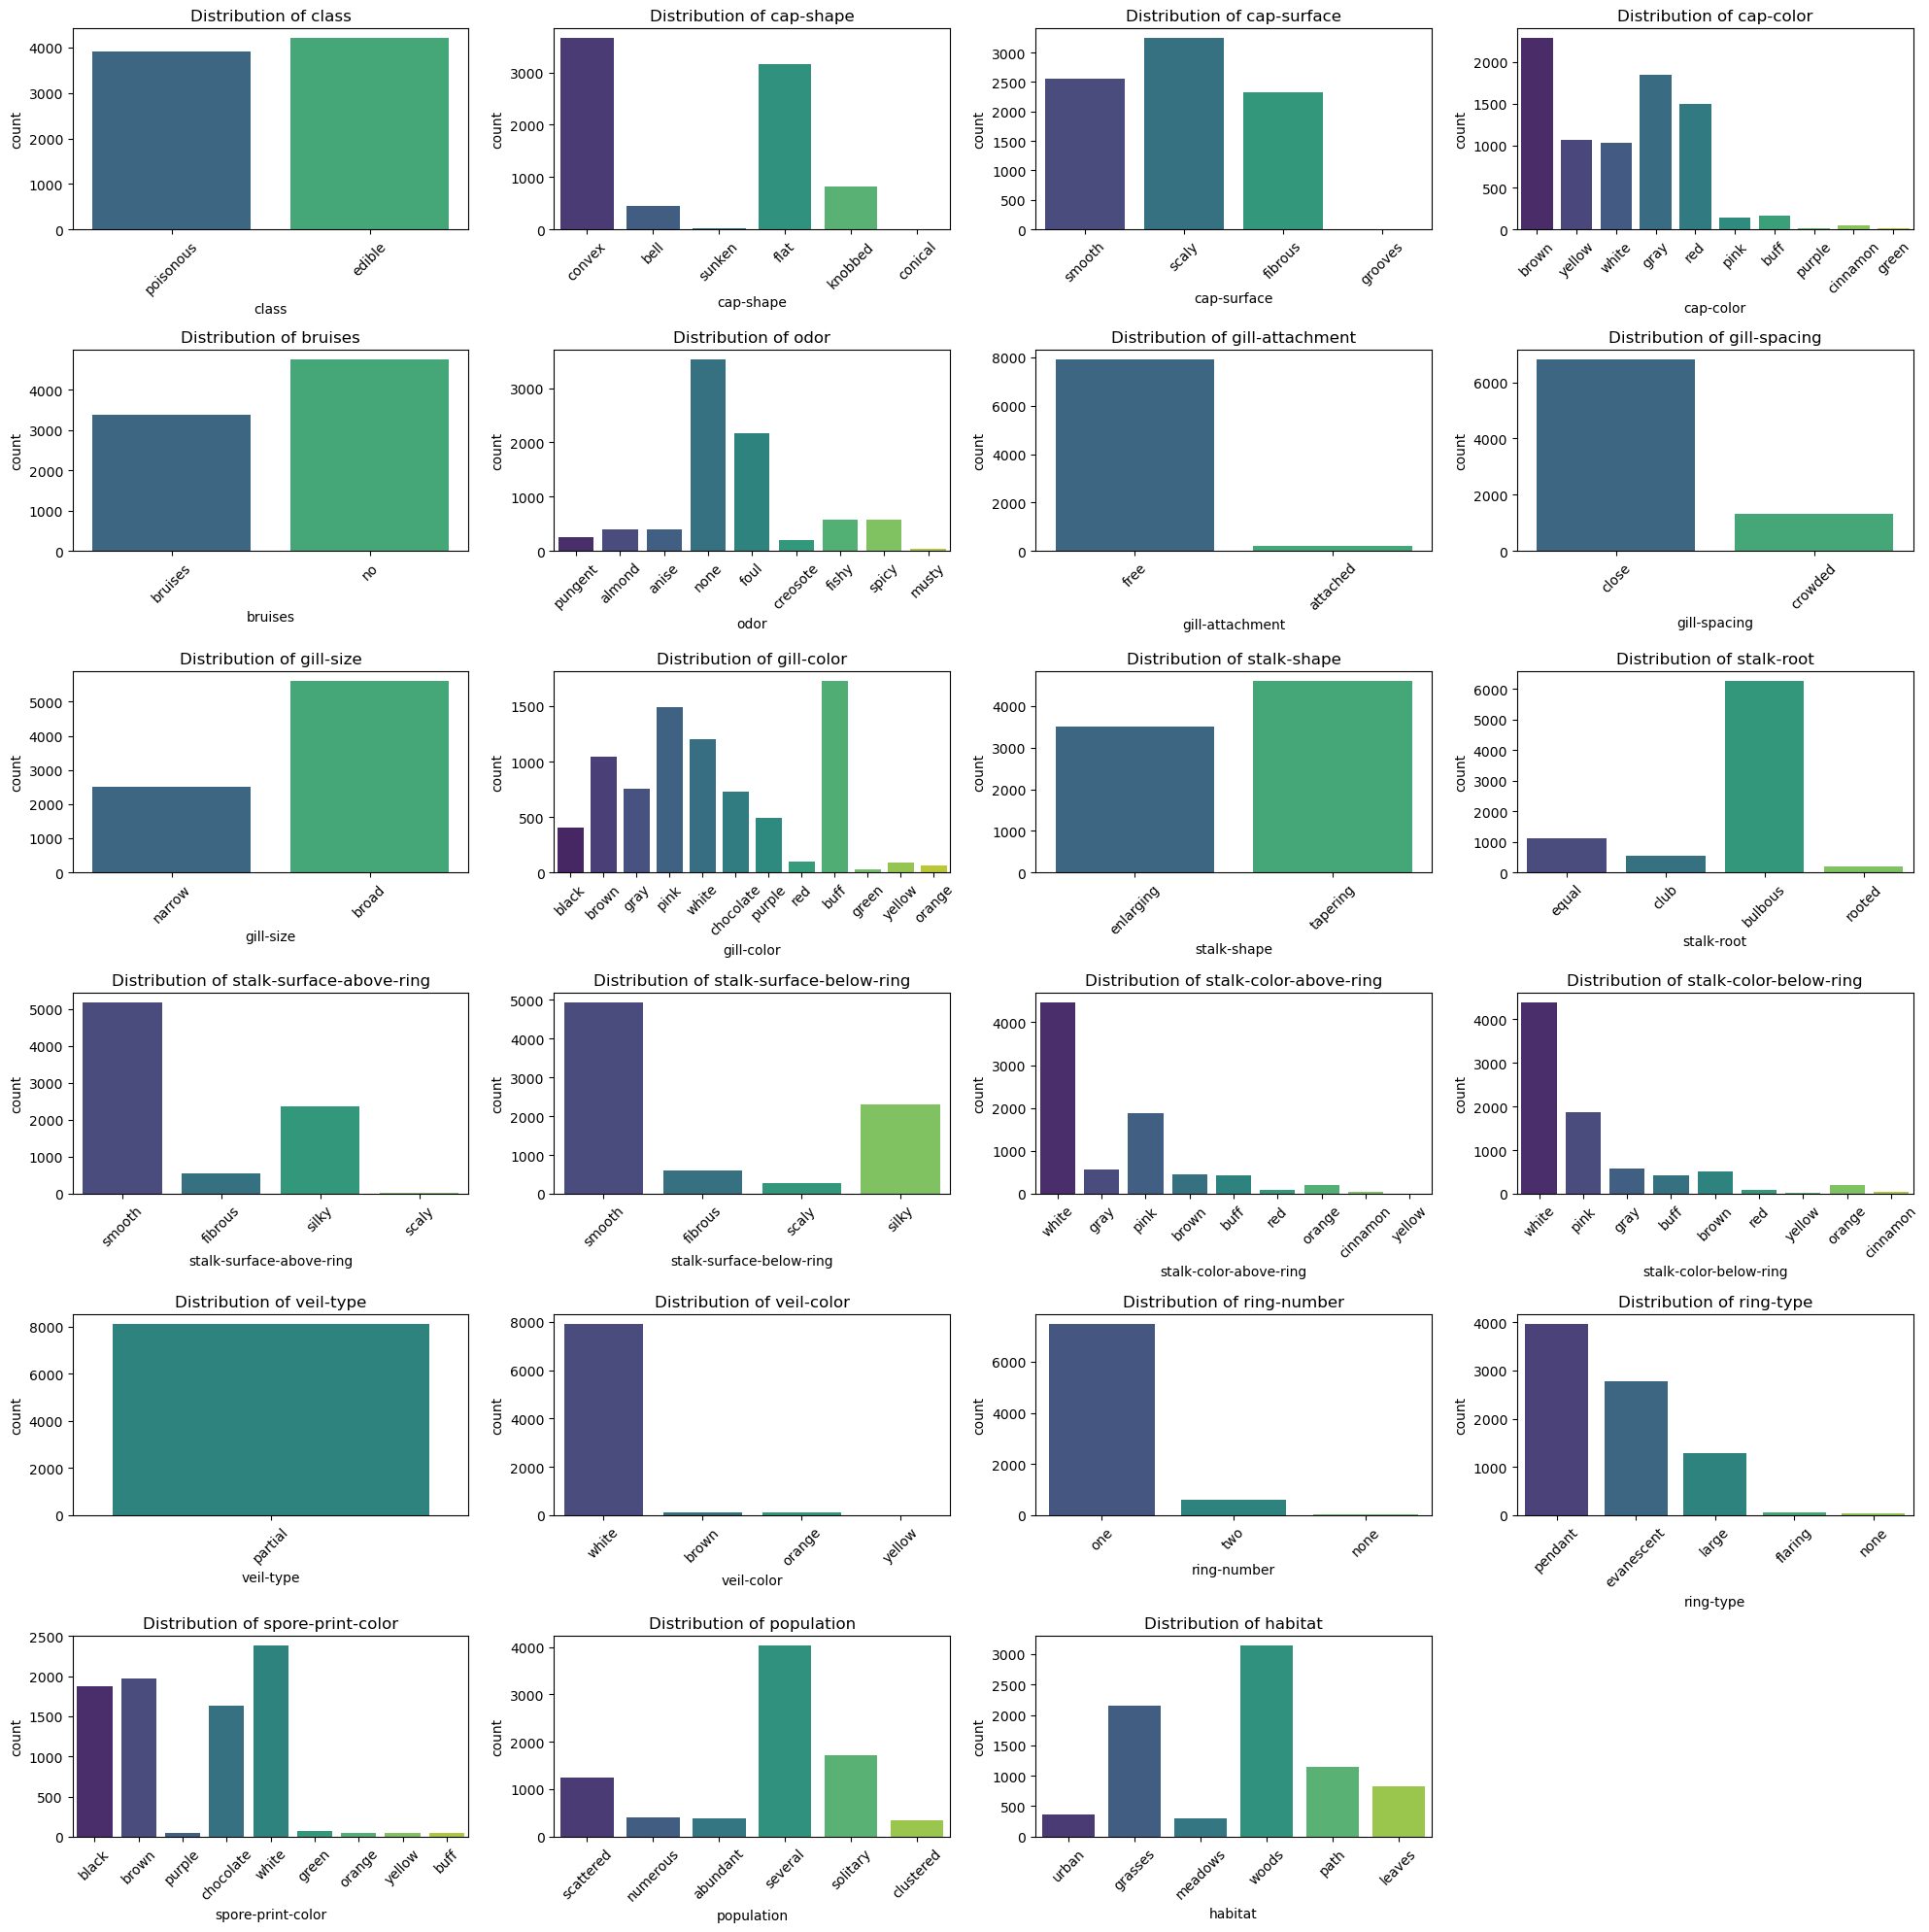

No numeric columns found for correlation matrix calculation.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions of categorical variables
plt.figure(figsize=(20, 20))
num_plots = len(df.columns)
cols_per_row = 4
rows = num_plots // cols_per_row + 1
for i, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        plt.subplot(rows, cols_per_row, i+1)
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate and visualize correlation matrix
# Check if there are numeric columns for correlation matrix calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) > 0:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Pairwise Feature Correlation')
    plt.show()
else:
    print("No numeric columns found for correlation matrix calculation.")


### Feature Engineering

In [9]:
!pip install pycaret

## Task 2

In [10]:
from pycaret.classification import *

# Initialize the setup
clf = setup(data=df, target='class', categorical_features=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])


,Description,Value
0,Session id,6173
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(8124, 111)"
6,Transformed train set shape,"(5686, 111)"
7,Transformed test set shape,"(2438, 111)"
8,Categorical features,22
9,Rows with missing values,2.4%


In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3790
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3520
rf,Random Forest Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6650
qda,Quadratic Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4160
et,Extra Trees Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4290
lightgbm,Light Gradient Boosting Machine,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4990
dt,Decision Tree Classifier,0.9998,0.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.3190
ada,Ada Boost Classifier,0.9998,0.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.5410
ridge,Ridge Classifier,0.9996,0.0000,0.9996,0.9996,0.9996,0.9993,0.9993,0.3890
gbc,Gradient Boosting Classifier,0.9996,0.0000,0.9996,0.9996,0.9996,0.9993,0.9993,0.7720


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [12]:
# Create a model
model = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
final_model = finalize_model(tuned_model)
save_model(final_model, 'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                                               return_df=True,
                                                               use_cat_n

In [16]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Log the model to MLflow
import mlflow.pyfunc

mlflow.pyfunc.log_model("final_model", "final_model")

2024/02/26 01:07:54 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logged at level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/02/26 01:08:01 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: 

In [19]:
!mlflow ui

^C


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

# Separate the data into features (X) and target variable (y)
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets while ensuring a balanced class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually stratify the data to ensure a balanced class distribution in both sets
X_train_resampled = pd.DataFrame(columns=X_train.columns)
y_train_resampled = pd.Series()

for class_label in df['class'].unique():
    X_class = X_train[y_train == class_label]
    y_class = y_train[y_train == class_label]
    X_class_resampled, y_class_resampled = resample(X_class, y_class, random_state=42)
    X_train_resampled = pd.concat([X_train_resampled, X_class_resampled])
    y_train_resampled = pd.concat([y_train_resampled, y_class_resampled])

# Shuffle the resampled data
X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)

# Now use X_train_resampled, y_train_resampled, X_test, y_test for further analysis


In [21]:
# Calculate feature importance (example using permutation importance)
from sklearn.inspection import permutation_importance

# Assuming 'final_model' is your trained model
perm_importance = permutation_importance(final_model, X_test, y_test)

In [22]:
# Get feature importances
feature_importances = perm_importance.importances_mean

# Sort feature importances
sorted_idx = feature_importances.argsort()[::-1]

# Print top 5 features
top_5_features = X_test.columns[sorted_idx][:5]
print("Top 5 features:", top_5_features)

Top 5 features: Index(['spore-print-color', 'odor', 'habitat', 'stalk-shape', 'cap-surface'], dtype='object')


In [24]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='most_frequent' for categorical data
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on X_train
X_train_imputed = imputer.fit_transform(X_train)

# Convert the imputed array back to a DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

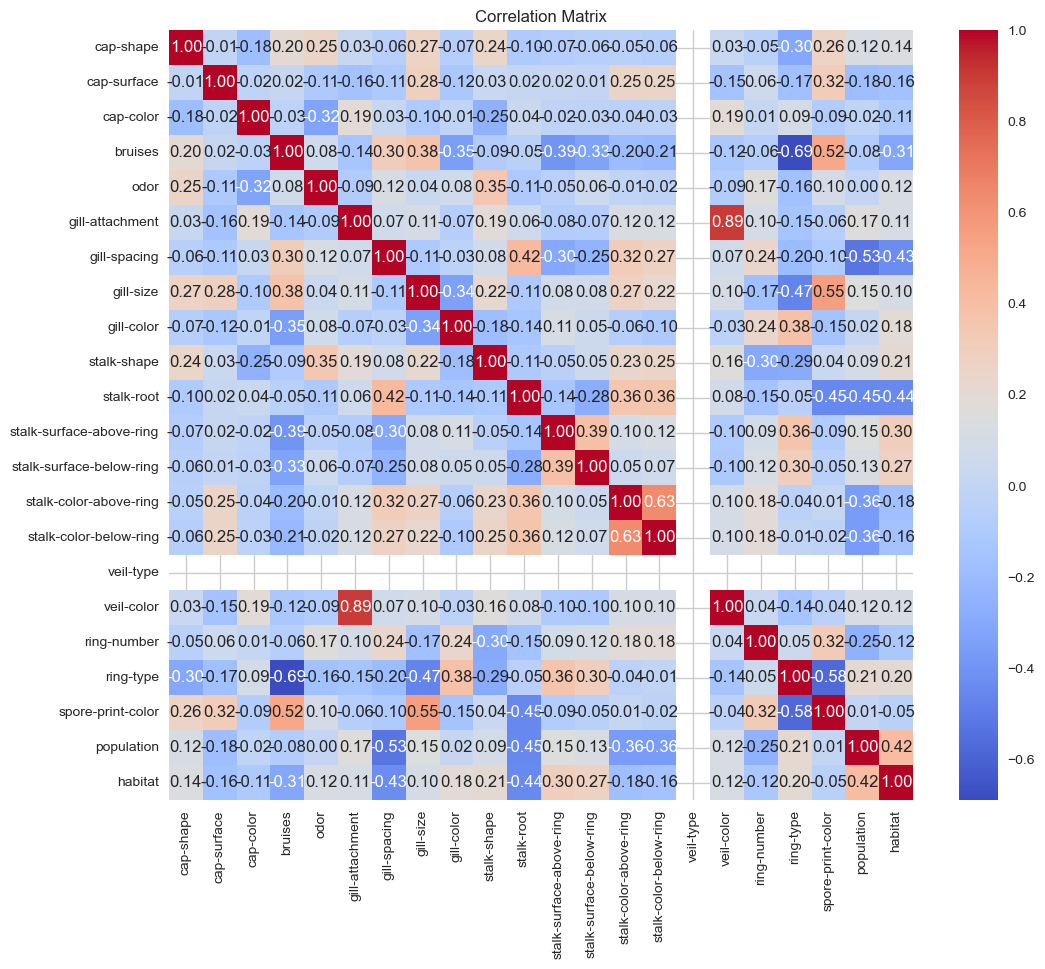

In [25]:
# Calculate correlation matrix
correlation_matrix = X_train_imputed.astype('category').apply(lambda x: x.cat.codes).corr(method='pearson')

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Calculate correlation matrix
correlation_matrix = df.astype('category').apply(lambda x: x.cat.codes).corr(method='pearson')

# Select the top 5 features with positive correlation with the target variable
top_positive_corr_features = correlation_matrix['class'].sort_values(ascending=False).head(6)[1:]

# Create a new DataFrame with the top 5 features and the target variable
new_df = df[list(top_positive_corr_features.index) + ['class']]

# Display the new DataFrame
print(new_df.head())

  gill-size spore-print-color  bruises population cap-shape      class
0    narrow             black  bruises  scattered    convex  poisonous
1     broad             brown  bruises   numerous    convex     edible
2     broad             brown  bruises   numerous      bell     edible
3    narrow             black  bruises  scattered    convex  poisonous
4     broad             brown       no   abundant    convex     edible


In [27]:
from pycaret.classification import *

# Set up the PyCaret environment
exp_clf = setup(data=new_df, target='class')

,Description,Value
0,Session id,7143
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 6)"
5,Transformed data shape,"(8124, 24)"
6,Transformed train set shape,"(5686, 24)"
7,Transformed test set shape,"(2438, 24)"
8,Categorical features,5
9,Preprocess,True


In [28]:
# Compare models and tune hyperparameters
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9872,0.0000,0.9872,0.9875,0.9872,0.9743,0.9747,0.0750
rf,Random Forest Classifier,0.9872,0.0000,0.9872,0.9875,0.9872,0.9743,0.9747,0.2670
et,Extra Trees Classifier,0.9872,0.0000,0.9872,0.9875,0.9872,0.9743,0.9747,0.2070
lightgbm,Light Gradient Boosting Machine,0.9872,0.0000,0.9872,0.9875,0.9872,0.9743,0.9747,0.2440
gbc,Gradient Boosting Classifier,0.9849,0.0000,0.9849,0.9854,0.9849,0.9697,0.9702,0.2840
knn,K Neighbors Classifier,0.9836,0.0000,0.9836,0.9839,0.9836,0.9673,0.9675,0.0870
lr,Logistic Regression,0.9724,0.0000,0.9724,0.9730,0.9724,0.9448,0.9454,0.0830
svm,SVM - Linear Kernel,0.9724,0.0000,0.9724,0.9730,0.9724,0.9448,0.9454,0.0910
ridge,Ridge Classifier,0.9689,0.0000,0.9689,0.9698,0.9689,0.9378,0.9387,0.1250
lda,Linear Discriminant Analysis,0.9689,0.0000,0.9689,0.9698,0.9689,0.9378,0.9387,0.1070


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [29]:
# Train the best model
final_model = finalize_model(best_model)

In [30]:
# Evaluate the model
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
# Save the model
save_model(final_model, 'feature_engineering_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_estimator',
          

In [32]:
import mlflow

# Log the model
mlflow.sklearn.log_model(final_model, "feature_engineering_model")

In [34]:
import pandas as pd

# Define the features used in your model
features = ['gill-size', 'spore-print-color', 'bruises', 'population', 'cap-shape']

# Collect user input for each feature
user_input_values = []
for feature in features:
    user_input = input(f"Enter value for {feature}: ")
    user_input_values.append(user_input)

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input_values], columns=features)

# Make predictions using the trained model
predicted_class = final_model.predict(user_input_df)

print("Predicted class:", predicted_class)

Enter value for gill-size: narrow
Enter value for spore-print-color: black
Enter value for bruises: bruises
Enter value for population: scattered
Enter value for cap-shape: bell
Predicted class: 0    poisonous
Name: class, dtype: object
